<a href="https://colab.research.google.com/github/ashisaxena710/LetsGrowMore/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
members=pd.read_csv("/content/drive/MyDrive/Lets Grow More/Music Recommendation/members.csv")
songs=pd.read_csv("/content/drive/MyDrive/Lets Grow More/Music Recommendation/songs.csv")
songs_info=pd.read_csv("/content/drive/MyDrive/Lets Grow More/Music Recommendation/song_extra_info.csv")
sample_submission=pd.read_csv("/content/drive/MyDrive/Lets Grow More/Music Recommendation/sample_submission.csv")
train_data=pd.read_csv("/content/drive/MyDrive/Lets Grow More/Music Recommendation/train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Lets Grow More/Music Recommendation/test.csv")

In [4]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [5]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [6]:
songs_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [7]:
sample_submission.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
train_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [9]:
test_data.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [10]:
print(f"The songs_data has {songs.shape[0]} rows and {songs.shape[1]} columns")
print(f"The songs_extra_info_data  has {songs_info.shape[0]} rows and {songs_info.shape[1]} columns")
print(f"The members_data has {members.shape[0]} rows and {members.shape[1]} columns")
print(f"The sample_submission_data  has {sample_submission.shape[0]} rows and {sample_submission.shape[1]} columns")
print(f"The train_data has {train_data.shape[0]} rows and {train_data.shape[1]} columns")
print(f"The test_data has {test_data.shape[0]} rows and {test_data.shape[1]} columns")

The songs_data has 2296320 rows and 7 columns
The songs_extra_info_data  has 2295971 rows and 3 columns
The members_data has 34403 rows and 7 columns
The sample_submission_data  has 2556790 rows and 2 columns
The train_data has 7377418 rows and 6 columns
The test_data has 2556790 rows and 6 columns


In [11]:
# We will be using songs, songs_info and training data.
main_df = pd.merge(pd.merge(train_data, songs_info, on='song_id', how='left'), songs, on='song_id', how='left')

In [12]:
main_df.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,Good Grief,GBUM71602854,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,Lords of Cardboard,US3C69910183,284584.0,1259,Various Artists,NaN,NaN,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0


Understanding each column of our main datadrame:
- **msno**: This is a "Member Serial Number" and this represent a unique identifier for the user or member interacting with the music platform.

- **song_id**: This is a unique identifier for each song.

- **source_system_tab**: Refers to the tab or section of the music platform's user interface where the song was accessed or discovered.

- **source_screen_name**: Represents the specific screen or UI element where the song was interacted with or viewed.

- **source_type**: Describes the type of source through which the song was accessed, such as "album", "online-playlist", etc.

- **target**: Likely a binary indicator (0 or 1) representing whether the user engaged with the song (1) or not (0), possibly indicating if the song was liked or added to a playlist.

- **name_x**: Possibly the name of the song.

- **isrc_x**: An International Standard Recording Code (ISRC), which is a unique identifier for sound and music video recordings.

- **name_y**: Another possible name of the song (this could be a duplicate of name_x or could refer to a different version/representation of the song).

- **isrc_y**: Another ISRC code (similar to isrc_x).

- **song_length**: The duration of the song in seconds.

- **genre_ids**: IDs or codes representing the genre(s) of the song.

- **artist_name**: The name of the artist who performed the song.

- **composer**: The composer of the song.

- **lyricist**: The lyricist who wrote the lyrics for the song.

- **language**: The language in which the song is primarily performed.



In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   msno                object 
 1   song_id             object 
 2   source_system_tab   object 
 3   source_screen_name  object 
 4   source_type         object 
 5   target              int64  
 6   name                object 
 7   isrc                object 
 8   song_length         float64
 9   genre_ids           object 
 10  artist_name         object 
 11  composer            object 
 12  lyricist            object 
 13  language            float64
dtypes: float64(2), int64(1), object(11)
memory usage: 844.3+ MB


We can drop certain columns that are not required.
* msno and song_id not required
* we can see that values in name_x and isrc_x columns are same as name_y and isrc_y columns respectively. Also both isrc columns are not required. So we will drop isrc_x, name_y and isrc_y columns.


We will rename 'name_x' as 'song_name'.

In [14]:
# dropping columns
columns_to_drop=['msno','song_id','isrc']
main_df=main_df.drop(columns=columns_to_drop)

In [15]:
# renaming the 'name_x' column to 'song_name'
main_df.rename(columns={'name_x':'song_name'},inplace=True)

In [16]:
# Checking our dataframe
main_df.head(3)

,source_system_tab,source_screen_name,source_type,target,name,song_length,genre_ids,artist_name,composer,lyricist,language
0,explore,Explore,online-playlist,1,Good Grief,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,my library,Local playlist more,local-playlist,1,Lords of Cardboard,284584.0,1259,Various Artists,NaN,NaN,52.0
2,my library,Local playlist more,local-playlist,1,Hip Hop Is Dead(Album Version (Edited)),225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0


We can see that our 'song_name' column is the fifth column.

Now we want to keep it as our first column.

In [17]:
column_order=['name'] + [col for col in main_df if col != 'name']
main_df=main_df[column_order]
main_df.head(3)

,name,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,Good Grief,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,Lords of Cardboard,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0
2,Hip Hop Is Dead(Album Version (Edited)),my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0


In [18]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   name                object 
 1   source_system_tab   object 
 2   source_screen_name  object 
 3   source_type         object 
 4   target              int64  
 5   song_length         float64
 6   genre_ids           object 
 7   artist_name         object 
 8   composer            object 
 9   lyricist            object 
 10  language            float64
dtypes: float64(2), int64(1), object(8)
memory usage: 675.4+ MB


Now let's check the null count of each column.

In [19]:
# Checking Null Count
main_df.isna().sum()

name                     1457
source_system_tab       24849
source_screen_name     414804
source_type             21539
target                      0
song_length               114
genre_ids              118455
artist_name               114
composer              1675706
lyricist              3178798
language                  150
dtype: int64

In [20]:
# For the sake of having the clean data we will all rows which contain null value.
main_df=main_df.dropna()

In [21]:
main_df.isna().sum()

name                  0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
dtype: int64

In [22]:
# Let's check the shape of our dataframe
main_df.shape

(3858703, 11)

Due to the large size of this DataFrame containing 3.8 million rows, it's causing Google Colab to crash. To address this issue, we have to work with a reduced dataset. Let us take 1 million rows by sampling. This will enable us to continue our analysis and computations without overwhelming the system's resources. By employing this downsized dataset, we aim to maintain a smoother and more stable working environment in Google Colab.






In [23]:
main_df=main_df.sample(100000)

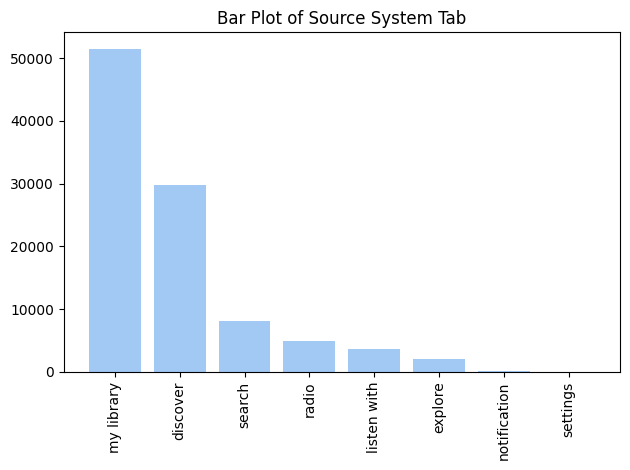

In [24]:
value_counts = main_df['source_system_tab'].value_counts()
sns.set_palette('pastel')  # You can experiment with different palettes

plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation='vertical')
plt.title('Bar Plot of Source System Tab')
plt.tight_layout()
plt.show()

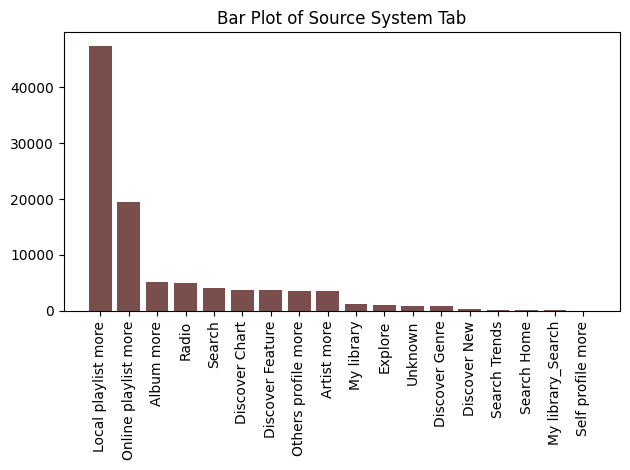

In [25]:
value_counts = main_df['source_screen_name'].value_counts()
sns.set_palette('pink')  # You can experiment with different palettes

plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation='vertical')
plt.title('Bar Plot of Source System Tab')
plt.tight_layout()
plt.show()

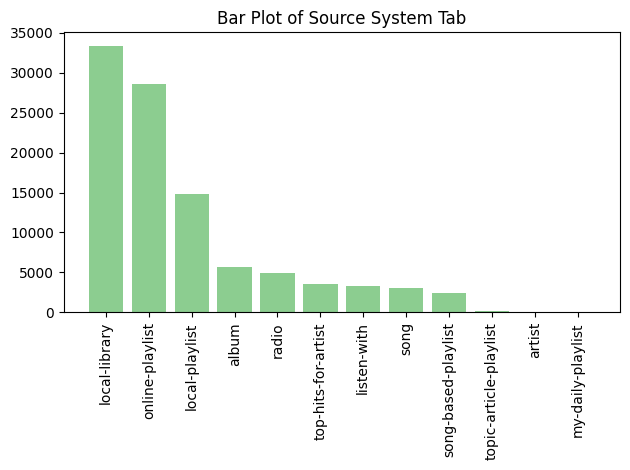

In [26]:
value_counts = main_df['source_type'].value_counts()
sns.set_palette('Greens_d')  # You can experiment with different palettes

plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation='vertical')
plt.title('Bar Plot of Source System Tab')
plt.tight_layout()
plt.show()

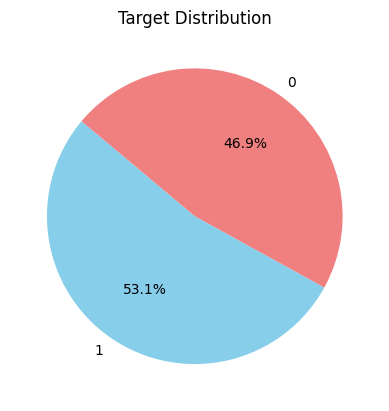

In [27]:
target_counts = main_df['target'].value_counts()
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Target Distribution')
plt.show()

###Textual Data Preprocessing

In [28]:
main_df['artist_name']= main_df['artist_name'].str.replace('|',' ',regex=True)
main_df['composer']= main_df['composer'].str.replace('/',' ',regex=True)
main_df['lyricist']= main_df['lyricist'].str.replace('/',' ',regex=True)
main_df['artist_name']=main_df['artist_name'].str.lower()
main_df['composer']=main_df['composer'].str.lower()
main_df['lyricist']=main_df['lyricist'].str.lower()

In [29]:
main_df['songs_details']=main_df['artist_name']+''+main_df['composer']+main_df['lyricist']
main_df.head()


,name,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,songs_details
736040,以後以後 (A better tomorrow),my library,Local playlist more,local-library,1,237505.0,465|458,林芯儀 (shennio lin),吳姝霆,張鵬鵬,3.0,林芯儀 (shennio lin)吳姝霆張鵬鵬
252967,感同身受,discover,Discover Feature,online-playlist,0,218070.0,465,林宥嘉 (yoga lin),skot suyama,林夕,3.0,林宥嘉 (yoga lin)skot suyama林夕
6682356,一萬個捨不得,my library,Local playlist more,local-library,0,208143.0,465,莊心妍,祁隆,祁隆,3.0,莊心妍祁隆祁隆
6423165,女孩 (Girl),discover,Online playlist more,online-playlist,0,275226.0,458,vox玩聲樂團,韋禮安,韋禮安,3.0,vox玩聲樂團韋禮安韋禮安
3631565,Surrender,discover,Discover Feature,online-playlist,1,215693.0,921,various artists,pharrell williams,pharrell williams,52.0,various artistspharrell williamspharrell williams


In [30]:
#Creating a copy file before performing similarity
new_df=main_df.copy()
new_df.head()

,name,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,songs_details
736040,以後以後 (A better tomorrow),my library,Local playlist more,local-library,1,237505.0,465|458,林芯儀 (shennio lin),吳姝霆,張鵬鵬,3.0,林芯儀 (shennio lin)吳姝霆張鵬鵬
252967,感同身受,discover,Discover Feature,online-playlist,0,218070.0,465,林宥嘉 (yoga lin),skot suyama,林夕,3.0,林宥嘉 (yoga lin)skot suyama林夕
6682356,一萬個捨不得,my library,Local playlist more,local-library,0,208143.0,465,莊心妍,祁隆,祁隆,3.0,莊心妍祁隆祁隆
6423165,女孩 (Girl),discover,Online playlist more,online-playlist,0,275226.0,458,vox玩聲樂團,韋禮安,韋禮安,3.0,vox玩聲樂團韋禮安韋禮安
3631565,Surrender,discover,Discover Feature,online-playlist,1,215693.0,921,various artists,pharrell williams,pharrell williams,52.0,various artistspharrell williamspharrell williams


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer='word',stop_words='english')
tfidf_matrix=tfidf.fit_transform(new_df['songs_details'])

In [32]:
tfidf_matrix.shape

(100000, 23930)

In textual data processing, there are 23,000 arrtibutes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

### Dimensionality Reduction
